***
# Case Study on Measures of Central Tendency and Dispersion
**Sreehari P S<br>Norka B5**
***

### Statement : 
An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fetech data
data = pd.read_csv('./datasets/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


### Q1: Find out how many males and females participated in the test.

In [3]:
data.groupby('gender').agg(count = ('gender','count'))

,count
gender,
female,518
male,482


From the above table it found that 518 female candidates and 482 male candidates participated in the test
***

### Q2: What do you think about the students' parental level of education?

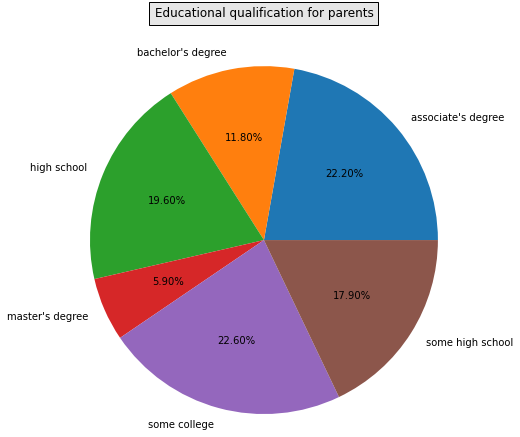

In [4]:
pe_edu = data.groupby('parental level of education').agg(Count = ('parental level of education','count'))
total = pe_edu['Count'].sum()
pe_edu['Percent'] = (pe_edu['Count']/total)*100
#Ploting
plt.pie(pe_edu['Percent'], labels = pe_edu.index, autopct='%.2f%%', radius= 2)
plt.title("Educational qualification for parents", y = 1.5, bbox = {'facecolor':'0.9','pad':5})
plt.show()

From the figure it can be summarized that around of 45% of parents has either an associate degree or went to some college. Only < 6% of parents pursuied master's degree. This may have an impact in students academic as well as overall performance.
***

### Q3: Who scores the most on average for math, reading and writing based on
**1. Gender**

In [5]:
data.groupby('gender').agg(Math_Average = ('math score', np.mean), Read_Average = ('reading score', np.mean), Write_Average = ('writing score', np.mean))

,Math_Average,Read_Average,Write_Average
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


For <u>Mathematics</u> "*Male*" candidates has the highest average but when it comes to <u>reading and writing</u> "*Female*" candidates excels.
***

**2. Test preparation course**

In [6]:
data.groupby('test preparation course').agg(Math_Average = ('math score', np.mean), Read_Average = ('reading score', np.mean), Write_Average = ('writing score', np.mean))

,Math_Average,Read_Average,Write_Average
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Candidates who *completed test prepartion course* has highest average in all 3 subjects
***

### Q4: What do you think about the scoring variation for math, reading and writing based on
**1. Gender**

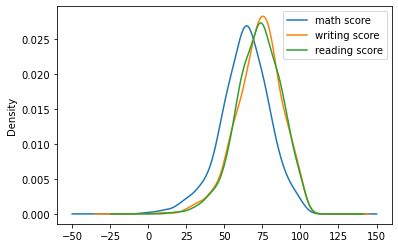

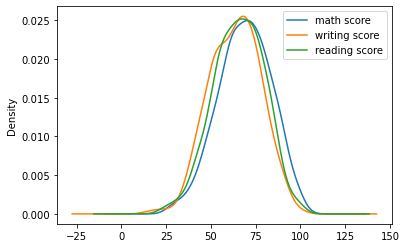

,Math_STD,Read_STD,Write_STD
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [7]:
female = data[data['gender']=='female']
female[['math score', 'writing score', 'reading score']].plot.kde(label = 'proi')
male = data[data['gender']=='male']
male[['math score', 'writing score', 'reading score']].plot.kde()
plt.show()
data.groupby('gender').agg(Math_STD = ('math score', np.std), Read_STD = ('reading score', np.std), Write_STD = ('writing score', np.std))

For Mathematics, female candidates have high standard deviation, for rest of subjects it is comparable

**2. Test Preparation course**

In [8]:
data.groupby('test preparation course').agg(Math_STD = ('math score', np.std), Read_STD = ('reading score', np.std), Write_STD = ('writing score', np.std))

,Math_STD,Read_STD,Write_STD
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


For all 3 subjects standard deviation is less for those who completed test preparation course when compared to those didn't attend.
***

### Q5: 
The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.

In [9]:
q3 = data['math score'].quantile(0.75)
print(f'Math score upper quartile = {q3}')

Math score upper quartile = 77.0


*Deduction* : The upper quartile indicates that any student who scored above 77 marks in mathematics is qualified to obtain bonus points